# Final Project COMP 603

In [146]:
# Import required modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Create Pandas Dataframe using the CSV

In [147]:
columns = ['CustomerID','Year','Week','Volume'] # Define Columns Name Here.

In [148]:
parcel_df = pd.read_csv('COVID_Parcel_Business.csv',names=columns,header=0)
parcel_df.head(10)

,CustomerID,Year,Week,Volume
0,718117,2021,1,8
1,718117,2020,7,257
2,718117,2019,39,141
3,718117,2018,1,14
4,718117,2021,2,192
5,718117,2018,2,18
6,718117,2020,8,232
7,718117,2020,10,229
8,718117,2020,2,251
9,718117,2019,5,93


Lets study the Dataframe to set more info for the Dataset we are using.

Use describe and info to see the Data Type , If there is any missing values.

In [149]:
parcel_df.describe(include="all")

,CustomerID,Year,Week,Volume
count,190719.000000,190719.000000,190719.000000,190719.000000
mean,541440.234963,2019.395220,25.676377,1174.911519
std,264861.365663,1.068845,14.722539,11586.730666
min,100771.000000,2018.000000,1.000000,1.000000
25%,308930.000000,2018.000000,13.000000,25.000000
50%,529707.000000,2019.000000,25.000000,58.000000
75%,778800.000000,2020.000000,38.000000,162.000000
max,999362.000000,2021.000000,53.000000,640590.000000


In [150]:
parcel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190719 entries, 0 to 190718
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   CustomerID  190719 non-null  int64
 1   Year        190719 non-null  int64
 2   Week        190719 non-null  int64
 3   Volume      190719 non-null  int64
dtypes: int64(4)
memory usage: 5.8 MB


Based on Above info we can say that there is no missing value

Check the number of unique values for all the Columns

In [151]:
for col in parcel_df.columns:
  print(f'Unique Values of {col}: {len(parcel_df[col].unique())}')

Unique Values of CustomerID: 1061
Unique Values of Year: 4
Unique Values of Week: 53
Unique Values of Volume: 8332


## Important Period Table

Lets us 1st add the timeline in the table to define all the important period.
 2019 Important Dates

| **Period**      | **Start Date**     | **End Date**       | **Week Numbers**       |
|------------------|--------------------|--------------------|------------------------|
| Year Start       | January 1, 2019   | January 5, 2019    | Week 1                |
| Year End         | December 29, 2019 | December 31, 2019  | Week 53               |
| Peak Season      | November 4, 2019  | January 20, 2020   | Weeks 45–4 (2019–2020)|

 2020 Important Dates

| **Period**        | **Start Date**     | **End Date**       | **Week Numbers**       |
|--------------------|--------------------|--------------------|------------------------|
| Year Start         | January 1, 2020   | January 4, 2020    | Week 1                |
| Year End           | December 27, 2020 | December 31, 2020  | Week 53               |
| Pre-COVID Period   | January 1, 2020   | Week 15 of 2020 | Weeks 1–15           |
| COVID Observation  | Week 16 of 2020  | Week 53 of 2020 | Weeks 16–53          |
| Peak Season        | November 2, 2020  | January 17, 2021   | Weeks 45–3 (2020–2021)|


## Classify customers based on growth labels


| **Customer Size**        | **Definition**     | **Discount**       
|--------------------|--------------------|--------------------|
| Enterprise       | 2019 parcel volume > 500k pieces  | 22%   |
| Large          | 2019 parcel volume b/w 200k-500k | 17%  | 
| Medium  | 2019 parcel volume b/w 10k-200k   | 10% | 
| Small  | 2019 parcel volume b/w 1k-20k  | 4% | 


Steps to Add Define the Customer Label to each Customers. 
1. Get all the data for 2019.
2. Get Sum of Volume of Each Customer and store in total_volume_per_customer.
3. Add a new column Customer Size in Data frame.
4. Based on total_volume_per_customer get the total volume and assign customer Size based on it.

In [152]:
# Return Filtered DataFrame for mention period based 
def get_parcel_by_period(startYear, startWeek, endYear, endWeek):
    # Filter for rows within the start year and week
    start_period = (parcel_df['Year'] > startYear) | ((parcel_df['Year'] == startYear) & (parcel_df['Week'] >= startWeek))
    
    # Filter for rows within the end year and week
    end_period = (parcel_df['Year'] < endYear) | ((parcel_df['Year'] == endYear) & (parcel_df['Week'] <= endWeek))
    
    # Apply both filters
    filtered_df = parcel_df[start_period & end_period]
    
    return filtered_df


In [153]:
# Get all the parcel for 2019.
parcel_2019 = get_parcel_by_period(2019,1,2019,53)
parcel_2019.head(10)

,CustomerID,Year,Week,Volume
2,718117,2019,39,141
9,718117,2019,5,93
12,718117,2019,49,215
19,718117,2019,47,183
21,718117,2019,4,65
25,718117,2019,33,100
30,718117,2019,53,171
32,718117,2019,40,143
38,718117,2019,38,163
46,718117,2019,52,87


In [154]:
# Calculate the total parcel volume for each CustomerID in the given DataFrame.
def calculate_total_volume_per_customer(df):
    total_volume_per_customer = df.groupby('CustomerID')['Volume'].sum()
    return total_volume_per_customer

In [155]:
total_volume_per_customer = calculate_total_volume_per_customer(parcel_2019)
total_volume_per_customer

CustomerID
100771     1816
102180     5222
102643     2670
102750     1013
103308    90140
          ...  
994361     2608
994762     1073
995173     1632
999141     3364
999362     3561
Name: Volume, Length: 1061, dtype: int64

In [156]:
# This function is to to add Customer Size and Discount for that customers for mentioned year.
def assignCustomerSizeForYear(year):
    column_customer_size_year = f'Customer Size {year}'
    column_discount_year = f'Discount % {year}'

    # Initialize columns in the DataFrame
    parcel_df[column_customer_size_year] = ''  # Add new column for Customer Size
    parcel_df[column_discount_year] = 0  # Add new column for Discount %

    # Get the parcel data for that year
    parcel_year = get_parcel_by_period(year, 1, year, 53)

    # Calculate the total volume per customer for the year
    total_volume_per_customer_year = calculate_total_volume_per_customer(parcel_year)

    # Iterate over the DataFrame rows
    for index, row in parcel_df.iterrows():
        customer_id = row['CustomerID']
        total_volume = total_volume_per_customer_year.get(customer_id, None)  # Get total volume or None if not found                     s

        # Assign customer size and discount based on total volume
        if total_volume is None:
            parcel_df.at[index, column_customer_size_year] = 'Miscellaneous'  # Leave empty if no volume
            parcel_df.at[index, column_discount_year] = 0  # Set discount to 0
        elif total_volume > 500000:
            parcel_df.at[index, column_customer_size_year] = 'Enterprise'
            parcel_df.at[index, column_discount_year] = 22
        elif 200000 < total_volume <= 500000:
            parcel_df.at[index, column_customer_size_year] = 'Large'
            parcel_df.at[index, column_discount_year] = 17
        elif 10000 < total_volume <= 200000:
            parcel_df.at[index, column_customer_size_year] = 'Medium'
            parcel_df.at[index, column_discount_year] = 10
        else:
            parcel_df.at[index, column_customer_size_year] = 'Small'
            parcel_df.at[index, column_discount_year] = 4

For Each year add Customers Size.

In [157]:
years = parcel_df.Year.unique()
for year in years:
    assignCustomerSizeForYear(year)

parcel_df.head(10)

,CustomerID,Year,Week,Volume,Customer Size 2021,Discount % 2021,Customer Size 2020,Discount % 2020,Customer Size 2019,Discount % 2019,Customer Size 2018,Discount % 2018
0,718117,2021,1,8,Small,4,Medium,10,Small,4,Small,4
1,718117,2020,7,257,Small,4,Medium,10,Small,4,Small,4
2,718117,2019,39,141,Small,4,Medium,10,Small,4,Small,4
3,718117,2018,1,14,Small,4,Medium,10,Small,4,Small,4
4,718117,2021,2,192,Small,4,Medium,10,Small,4,Small,4
5,718117,2018,2,18,Small,4,Medium,10,Small,4,Small,4
6,718117,2020,8,232,Small,4,Medium,10,Small,4,Small,4
7,718117,2020,10,229,Small,4,Medium,10,Small,4,Small,4
8,718117,2020,2,251,Small,4,Medium,10,Small,4,Small,4
9,718117,2019,5,93,Small,4,Medium,10,Small,4,Small,4


In [158]:
for year in years:
    # Dynamic column name for the customer size of the given year
    column_customer_size_year = f'Customer Size {year}'
    
    # Group by CustomerID and take the first occurrence of 'Customer Size' for each customer
    unique_customers = parcel_df.groupby('CustomerID').first().reset_index()
    
    # Get the count of each Customer Size for the year
    customer_size_counts = unique_customers[column_customer_size_year].value_counts()

    # Print the counts for the year
    print(f"Customer Size counts for year {year}:\n{customer_size_counts}\n")


Customer Size counts for year 2021:
Customer Size 2021
Small            809
Medium           184
Miscellaneous     47
Enterprise        11
Large             10
Name: count, dtype: int64

Customer Size counts for year 2020:
Customer Size 2020
Small            776
Medium           234
Large             22
Miscellaneous     15
Enterprise        14
Name: count, dtype: int64

Customer Size counts for year 2019:
Customer Size 2019
Small         860
Medium        174
Large          15
Enterprise     12
Name: count, dtype: int64

Customer Size counts for year 2018:
Customer Size 2018
Small            843
Medium           152
Miscellaneous     36
Large             19
Enterprise        11
Name: count, dtype: int64



## Main Business Question
How did the COVID-19 pandemic impact ABC Company’s parcel business?

In [159]:
# Get the Parcel Data for 2019 and 2020 
parcel_2019 = get_parcel_by_period(2019, 1, 2019, 53)
parcel_2020 = get_parcel_by_period(2020, 1, 2020, 53)

Plot weekly total volume for each year to see the impact.

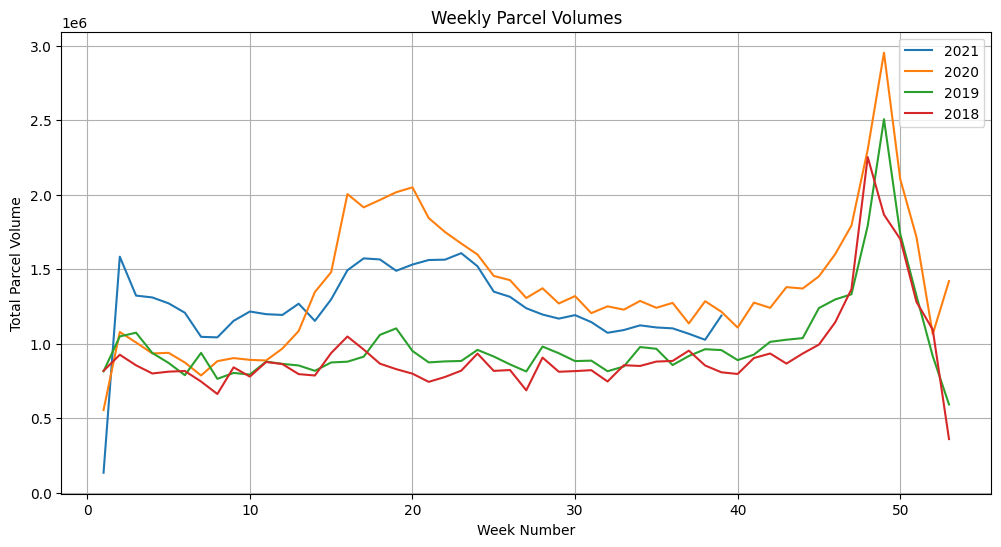

In [160]:
plt.figure(figsize=(12, 6))
for year in years:
    parcel_year = get_parcel_by_period(year, 1, year, 53)
    weekly_volume_year = parcel_year.groupby(['Week'])['Volume'].sum().reset_index()
    plt.plot(weekly_volume_year['Week'], weekly_volume_year['Volume'], label={year})
plt.title('Weekly Parcel Volumes')
plt.xlabel('Week Number')
plt.ylabel('Total Parcel Volume')
plt.legend()
plt.grid(True)
plt.show()


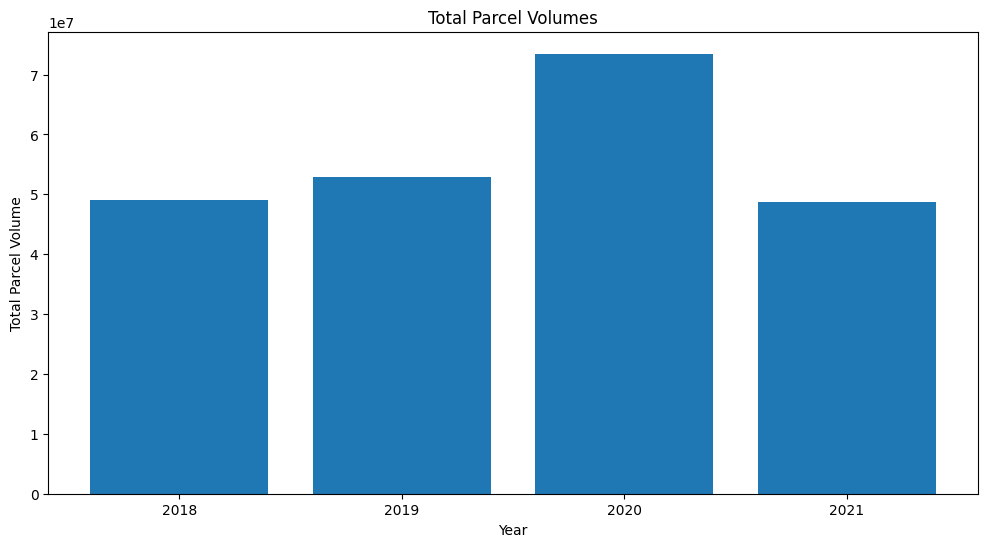

In [161]:
# Plotting total parcel volumes for all years.
plt.figure(figsize=(12, 6))
volume_years = []
for year in years:
    parcel_year = get_parcel_by_period(year, 1, year, 53)  # Adjust this function as per your data
    volume_year = parcel_year['Volume'].sum()
    volume_years.append(volume_year)

# Plot the results
plt.bar(years, volume_years)
plt.title('Total Parcel Volumes')
plt.xlabel('Year')
plt.ylabel('Total Parcel Volume')
plt.xticks(years)
plt.show()

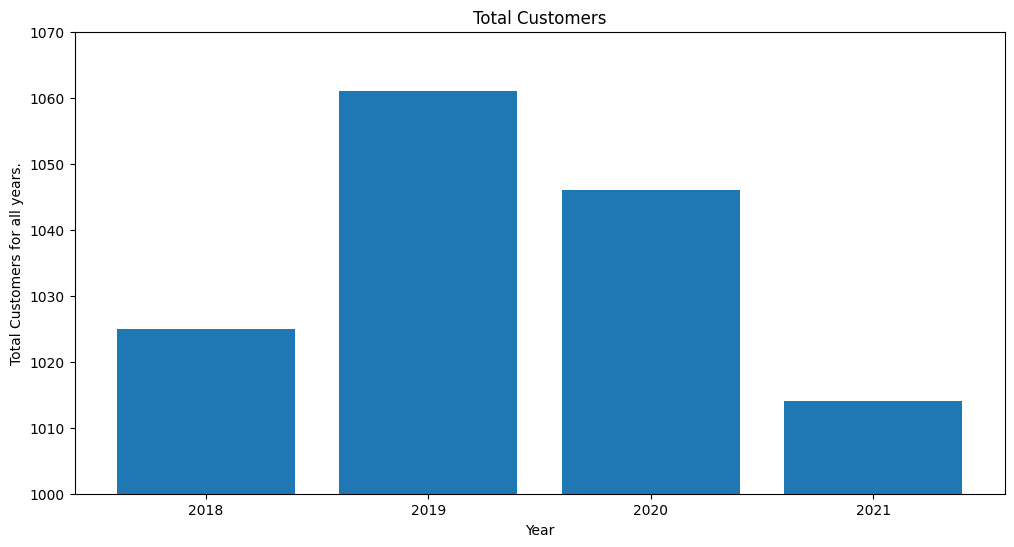

In [162]:
# Plotting total Customers for all years.
plt.figure(figsize=(12, 6))
customers_years = []
for year in years:
    parcel_year = get_parcel_by_period(year, 1, year, 53)
    customer_year = len(parcel_year['CustomerID'].unique())
    customers_years.append(customer_year)

# Plot the results
plt.bar(years, customers_years)
plt.title('Total Customers')
plt.xlabel('Year')
plt.ylabel('Total Customers for all years.')
plt.xticks(years)
plt.ylim(1000,1070)
plt.show()

The Above Graph shows following details :

* Increase in 2020: The rise in 2020 is likely due to increased e-commerce activity during the COVID-19 pandemic.
* There was spike in peak period for 2020
* Even there was less number of customer in 2020 as compare to 2019 volume has significantly high.

### When were customer volumes first impacted by COVID-19?
### What events within the COVID timeline may have contributed to the change?
* Here To show the impacted on the customers we will first plot the pre covid and post covid timeline i.e show total volume by week and then show all the covid related timelines.

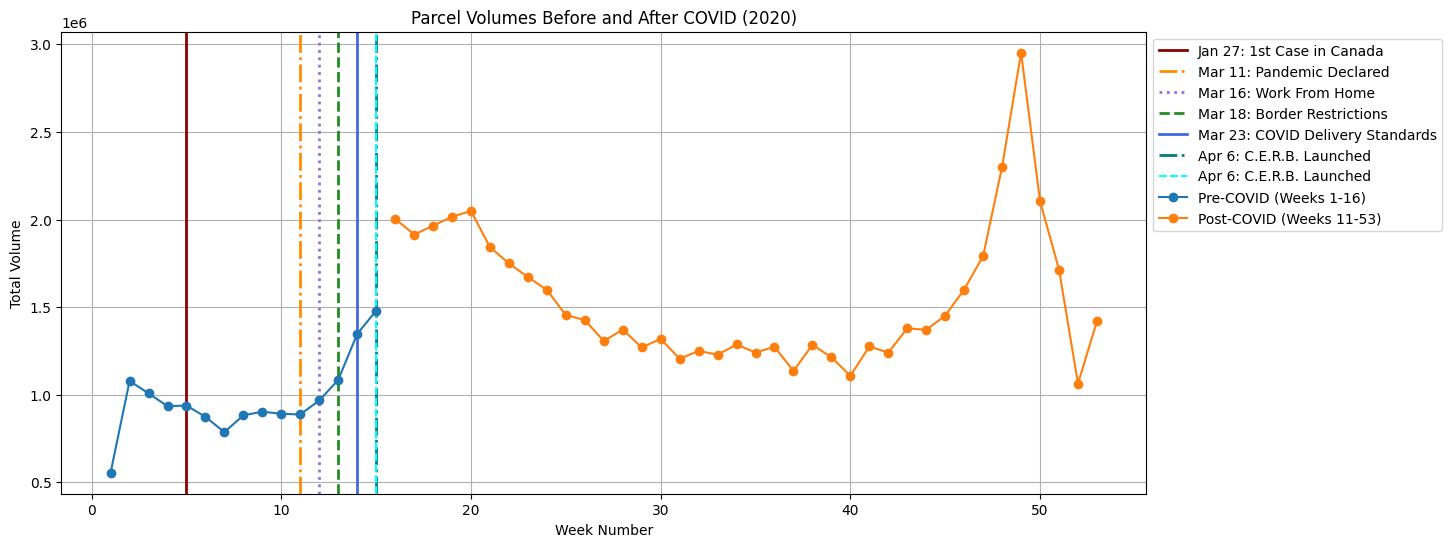

In [163]:
# Pre-COVID (Weeks 1–15, 2020)
# Covid(Week 16-53, 2020)
pre_covid_df = get_parcel_by_period(2020, 1, 2020, 15)
post_covid_df = get_parcel_by_period(2020, 16, 2020, 53)

# Aggregate weekly volumes
pre_covid_volume = pre_covid_df.groupby('Week')['Volume'].sum().reset_index()
post_covid_volume = post_covid_df.groupby('Week')['Volume'].sum().reset_index()

# Combine for comparison
plt.figure(figsize=(14, 6))
plt.axvline(x=5, color='darkred', linestyle='-', linewidth=2, label='Jan 27: 1st Case in Canada')
plt.axvline(x=11, color='darkorange', linestyle='-.', linewidth=2, label='Mar 11: Pandemic Declared')
plt.axvline(x=12, color='mediumpurple', linestyle=':', linewidth=2, label='Mar 16: Work From Home')
plt.axvline(x=13, color='forestgreen', linestyle='--', linewidth=2, label='Mar 18: Border Restrictions')
plt.axvline(x=14, color='royalblue', linestyle='-', linewidth=2, label='Mar 23: COVID Delivery Standards')
plt.axvline(x=15, color='teal', linestyle='-.', linewidth=2, label='Apr 6: C.E.R.B. Launched')
plt.axvline(x=15, color='cyan', linestyle='--', label='Apr 6: C.E.R.B. Launched')
plt.plot(pre_covid_volume['Week'], pre_covid_volume['Volume'], label='Pre-COVID (Weeks 1-16)', marker='o')
plt.plot(post_covid_volume['Week'], post_covid_volume['Volume'], label='Post-COVID (Weeks 11-53)', marker='o')

plt.title('Parcel Volumes Before and After COVID (2020)')
plt.xlabel('Week Number')
plt.ylabel('Total Volume')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


### 3. How did COVID-19 impact peak season in 2020?

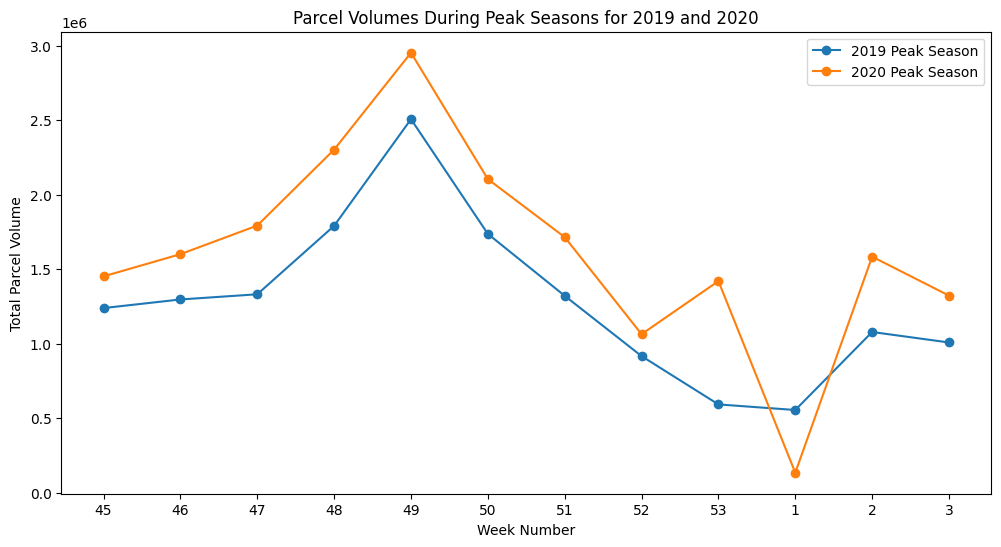

In [164]:
# Filter peak season data (Weeks 45–53 and Weeks 1–3)
def get_peak_season_data(start_year, end_year):
    first_part = get_parcel_by_period(start_year, 45, start_year, 53).copy()
    first_part.loc[:, 'Adjusted_Week'] = first_part['Week']
    second_part = get_parcel_by_period(end_year, 1, end_year, 3).copy()
    second_part.loc[:, 'Adjusted_Week'] = second_part['Week'] + 53
    return pd.concat([first_part, second_part])

# Get peak season data for 2019 and 2020
peak_2019 = get_peak_season_data(2019, 2020)
peak_2020 = get_peak_season_data(2020, 2021)

# Aggregate weekly volumes
peak_2019_volume = peak_2019.groupby('Adjusted_Week')['Volume'].sum().reset_index()
peak_2020_volume = peak_2020.groupby('Adjusted_Week')['Volume'].sum().reset_index()

# Plot the continuous graph
plt.figure(figsize=(12, 6))
plt.plot(peak_2019_volume['Adjusted_Week'], peak_2019_volume['Volume'], label='2019 Peak Season', marker='o')
plt.plot(peak_2020_volume['Adjusted_Week'], peak_2020_volume['Volume'], label='2020 Peak Season', marker='o')

# Update x-axis ticks to show original weeks
adjusted_weeks = list(range(45, 54)) + [1, 2, 3]  # Weeks 45–53 and 1–3
plt.xticks(ticks=range(45, 57), labels=adjusted_weeks)

# Customize the plot
plt.title('Parcel Volumes During Peak Seasons for 2019 and 2020')
plt.xlabel('Week Number')
plt.ylabel('Total Parcel Volume')
plt.legend()
plt.show()


The 2020 peak season saw a higher volume in Week 49 compared to 2019 , with a sharper increase and faster decline post-peak. An unusual spike in Week 2 of 2021 indicates lingering demand or shipment delays due to the pandemic.

## The Impact of COVID on Customer Segments:

### How has COVID affected companies in the different customer groups (Enterprise, Large, etc.)?

  Customer Size  Pre-COVID Volume (M)  COVID Volume (M)  Percent Change (%)
0    Enterprise             30.158229         44.674333           48.133145
1         Large              3.124683          5.781925           85.040370
2        Medium              4.517513          6.421639           42.149873
3         Small              1.881936          1.978776            5.145765


C:\Users\Dell\AppData\Local\Temp\ipykernel_41172\2656885520.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Size', y='Percent Change (%)', data=summary_df, palette='coolwarm')


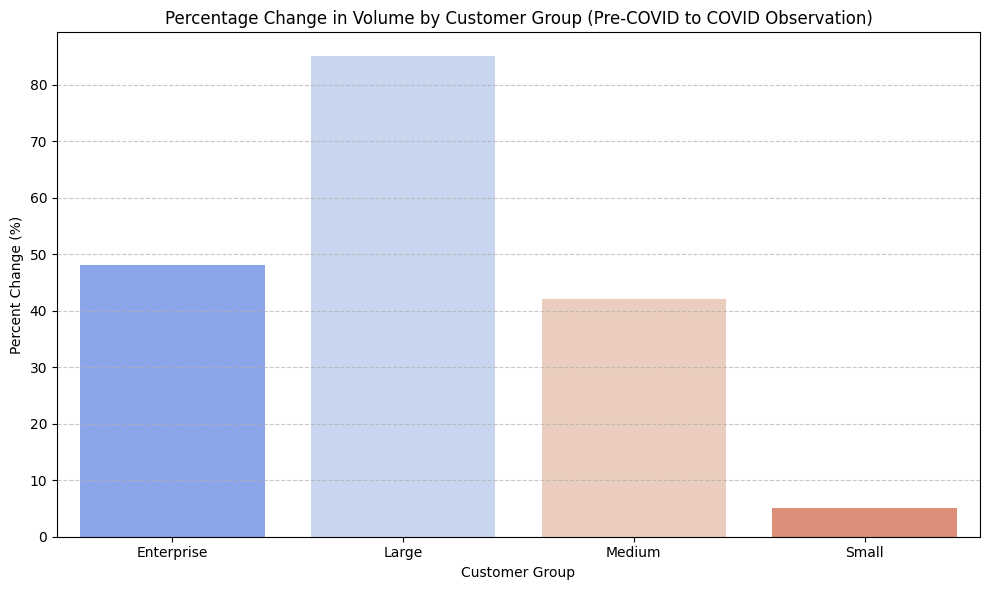

In [165]:
# Step 1: Define Pre-COVID and COVID Observation periods
pre_covid_df = get_parcel_by_period(2019, 16, 2019, 53).copy()
pre_covid_df.loc[:, 'Period'] = 'Pre-COVID'

covid_df = get_parcel_by_period(2020, 16, 2020, 53).copy()
covid_df.loc[:, 'Period'] = 'COVID Observation'

# Step 2: Combine both periods into a single DataFrame
combined_df = pd.concat([pre_covid_df, covid_df])

# Step 3: Assign customer size for 2020
combined_df.loc[:, 'Customer Size'] = combined_df['Customer Size 2020']
combined_df = combined_df[combined_df['Customer Size 2020'] != 'Miscellaneous']

# Step 4: Group by Customer Size and Period, and calculate total volume
volume_by_period = combined_df.groupby(['Customer Size', 'Period'])['Volume'].sum().reset_index()

# Step 5: Calculate Percentage Change
pre_covid_volumes = volume_by_period[volume_by_period['Period'] == 'Pre-COVID'].set_index('Customer Size')
covid_volumes = volume_by_period[volume_by_period['Period'] == 'COVID Observation'].set_index('Customer Size')

volume_change = covid_volumes['Volume'] - pre_covid_volumes['Volume']
percent_change = (volume_change / pre_covid_volumes['Volume']) * 100

# Combine data for visualization
summary_df = pd.DataFrame({
    'Customer Size': pre_covid_volumes.index,
    'Pre-COVID Volume (M)': pre_covid_volumes['Volume'] / 1_000_000,
    'COVID Volume (M)': covid_volumes['Volume'] / 1_000_000,
    'Percent Change (%)': percent_change
}).reset_index(drop=True)

print(summary_df)

# Step 6: Visualize percentage change using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer Size', y='Percent Change (%)', data=summary_df, palette='coolwarm')
plt.title('Percentage Change in Volume by Customer Group (Pre-COVID to COVID Observation)')
plt.xlabel('Customer Group')
plt.ylabel('Percent Change (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### What percent of each customer group is growing, moderately growing, and declining during the COVID observation period? 

In [166]:
def add_growth_label(previous_period_df, current_period_df, growth_label_str):
    # Step 1: Group volumes by CustomerID
    previous_volume_per_customer = calculate_total_volume_per_customer(previous_period_df)
    current_volume_per_customer = calculate_total_volume_per_customer(current_period_df)

    # Step 2: Merge the data into a single DataFrame
    growth_data = pd.DataFrame({
        'Previous_Volume': previous_volume_per_customer,
        'Current_Volume': current_volume_per_customer
    }).fillna(0)  # Fill missing values with 0

    # Step 3: Calculate overall Industry Standard Growth Rate (ISGR) as a percentage
    previous_volume_total = previous_volume_per_customer.sum()
    current_volume_total = current_volume_per_customer.sum()
    global_isgr = ((current_volume_total - previous_volume_total) / previous_volume_total) * 100 if previous_volume_total > 0 else 0

    # Step 4: Calculate individual ISGR (%)
    growth_data['ISGR (%)'] = np.where(
        growth_data['Previous_Volume'] > 0,
        ((growth_data['Current_Volume'] - growth_data['Previous_Volume']) / growth_data['Previous_Volume']) * 100,
        np.nan  # ISGR undefined for customers with 0 previous volume
    )

    # Step 5: Assign Growth_Label based on ISGR and thresholds
    def growth_label(row):
        if row['Previous_Volume'] == 0 and row['Current_Volume'] > 0:
            return 'New Customer'
        elif row['Previous_Volume'] > 0 and row['Current_Volume'] == 0:
            return 'Lost Customer'
        elif row['ISGR (%)'] > global_isgr + 50:
            return 'High Growth Customer'
        elif global_isgr <= row['ISGR (%)'] <= global_isgr + 50:
            return 'Moderately Growth Customer'
        elif 0 <= row['ISGR (%)'] < global_isgr:
            return 'Stable Customer'
        elif row['ISGR (%)'] < 0:
            return 'Declining Customer'
        else:
            return 'Unclassified'

    growth_data['Growth_Label'] = growth_data.apply(growth_label, axis=1)
    parcel_df[growth_label_str] = parcel_df['CustomerID'].map(growth_data['Growth_Label']).fillna('Unclassified')

In [167]:
previous_period_df = get_parcel_by_period(2019,1,2019,15)
current_period_df = get_parcel_by_period(2020,1,2020,15)
add_growth_label(previous_period_df,current_period_df,'Customer Growth Label')
parcel_df.head(10)

,CustomerID,Year,Week,Volume,Customer Size 2021,Discount % 2021,Customer Size 2020,Discount % 2020,Customer Size 2019,Discount % 2019,Customer Size 2018,Discount % 2018,Customer Growth Label
0,718117,2021,1,8,Small,4,Medium,10,Small,4,Small,4,High Growth Customer
1,718117,2020,7,257,Small,4,Medium,10,Small,4,Small,4,High Growth Customer
2,718117,2019,39,141,Small,4,Medium,10,Small,4,Small,4,High Growth Customer
3,718117,2018,1,14,Small,4,Medium,10,Small,4,Small,4,High Growth Customer
4,718117,2021,2,192,Small,4,Medium,10,Small,4,Small,4,High Growth Customer
5,718117,2018,2,18,Small,4,Medium,10,Small,4,Small,4,High Growth Customer
6,718117,2020,8,232,Small,4,Medium,10,Small,4,Small,4,High Growth Customer
7,718117,2020,10,229,Small,4,Medium,10,Small,4,Small,4,High Growth Customer
8,718117,2020,2,251,Small,4,Medium,10,Small,4,Small,4,High Growth Customer
9,718117,2019,5,93,Small,4,Medium,10,Small,4,Small,4,High Growth Customer


In [168]:
previous_period_df_covid = get_parcel_by_period(2019,16,2019,53)
current_period_df_covid = get_parcel_by_period(2020,16,2020,53)
add_growth_label(previous_period_df,current_period_df,'Customer Growth Label Covid')

In [169]:
# Group by CustomerID and take the first occurrence of 'Customer Size' for each customer
unique_customers = parcel_df.groupby('CustomerID').first().reset_index()
    
# Get the count of each Customer Size for the year
customer_size_counts = unique_customers['Customer Growth Label Covid'].value_counts()

print(customer_size_counts)

Customer Growth Label Covid
Declining Customer            481
Moderately Growth Customer    219
High Growth Customer          215
Stable Customer               102
New Customer                   22
Lost Customer                  18
Unclassified                    4
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

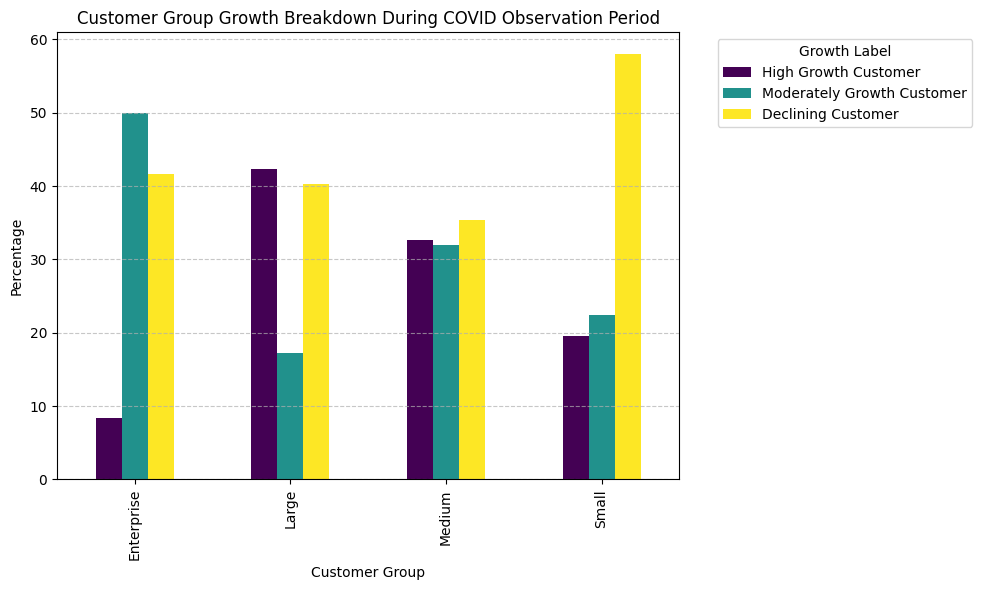

In [170]:
# Define the column for customer size in 2020
column_customer_size_year = f'Customer Size {2020}'

# Filter out "Miscellaneous" customer group
filtered_parcel_df = parcel_df[parcel_df[column_customer_size_year] != 'Miscellaneous']

# Group by customer size and growth label, then filter specific growth labels
growth_summary = filtered_parcel_df.groupby([column_customer_size_year, 'Customer Growth Label Covid']).size().unstack(fill_value=0)

# Retain only relevant columns (High Growth, Moderately Growth, Declining)
growth_summary = growth_summary[['High Growth Customer', 'Moderately Growth Customer', 'Declining Customer']]

# Calculate percentages for each group
growth_summary_percentage = growth_summary.div(growth_summary.sum(axis=1), axis=0) * 100

# Plot the filtered data
plt.figure(figsize=(10, 6))
ax = growth_summary_percentage.plot(kind='bar', figsize=(10, 6), colormap='viridis')
# Customize the plot
plt.title('Customer Group Growth Breakdown During COVID Observation Period')
plt.xlabel('Customer Group')
plt.ylabel('Percentage')
plt.legend(title='Growth Label', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### What percent of each customer group are new customers during the COVID observation period? 

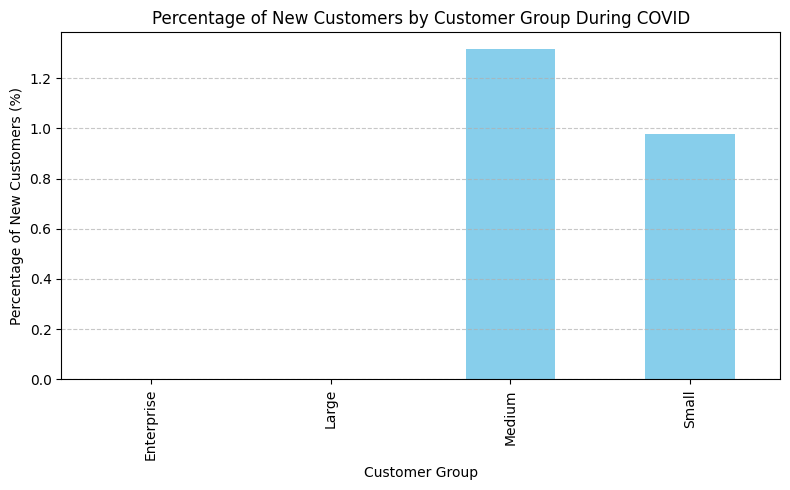

In [171]:
# Define the column for customer size in 2020
column_customer_size_year = f'Customer Size {2020}'

# Step 1: Filter for New Customers (Excluding Miscellaneous)
new_customers = parcel_df[
    (parcel_df['Customer Growth Label Covid'] == 'New Customer') &
    (parcel_df[column_customer_size_year] != 'Miscellaneous')
]

# Step 2: Group by Customer Size and count new customers
new_customer_counts = new_customers[column_customer_size_year].value_counts()

# Step 3: Calculate total customers in each group (excluding Miscellaneous)
total_customer_counts = parcel_df[
    parcel_df[column_customer_size_year] != 'Miscellaneous'
][column_customer_size_year].value_counts()

# Step 4: Calculate percentages
new_customer_percentage = (new_customer_counts / total_customer_counts) * 100

# Step 5: Visualize the results using a bar chart
plt.figure(figsize=(8, 5))
new_customer_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of New Customers by Customer Group During COVID')
plt.xlabel('Customer Group')
plt.ylabel('Percentage of New Customers (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


###	What percent of 2019 customers in each group did we lose during the COVID observation period?

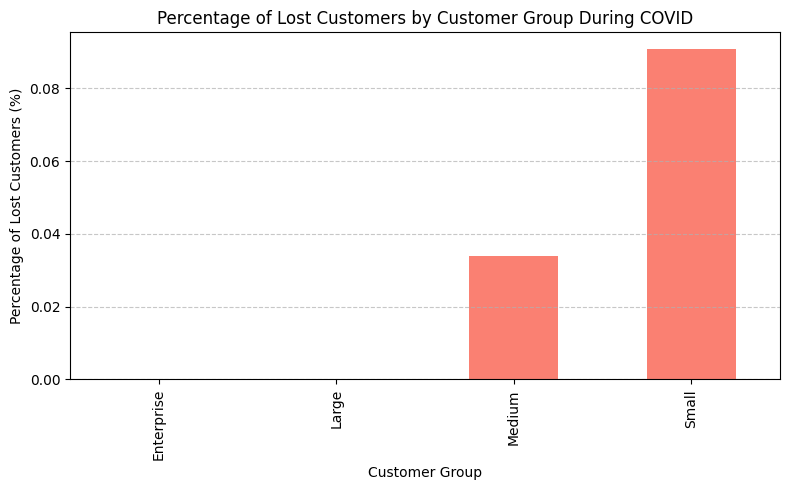

In [172]:
# Define the column for customer size in 2020
column_customer_size_year = f'Customer Size {2020}'

# Step 1: Filter for Lost Customers (Excluding Miscellaneous)
lost_customers = parcel_df[
    (parcel_df['Customer Growth Label Covid'] == 'Lost Customer') &
    (parcel_df[column_customer_size_year] != 'Miscellaneous')
]

# Step 2: Group by Customer Size and count lost customers
lost_customer_counts = lost_customers[column_customer_size_year].value_counts()

# Step 3: Calculate total customers in each group (excluding Miscellaneous)
total_customer_counts = parcel_df[
    parcel_df[column_customer_size_year] != 'Miscellaneous'
][column_customer_size_year].value_counts()

# Step 4: Calculate percentages
lost_customer_percentage = (lost_customer_counts / total_customer_counts) * 100
# Step 5: Visualize the results using a bar chart
plt.figure(figsize=(8, 5))
lost_customer_percentage.plot(kind='bar', color='salmon')
plt.title('Percentage of Lost Customers by Customer Group During COVID')
plt.xlabel('Customer Group')
plt.ylabel('Percentage of Lost Customers (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### What was the overall impact of COVID on volumes and revenue by customer group?

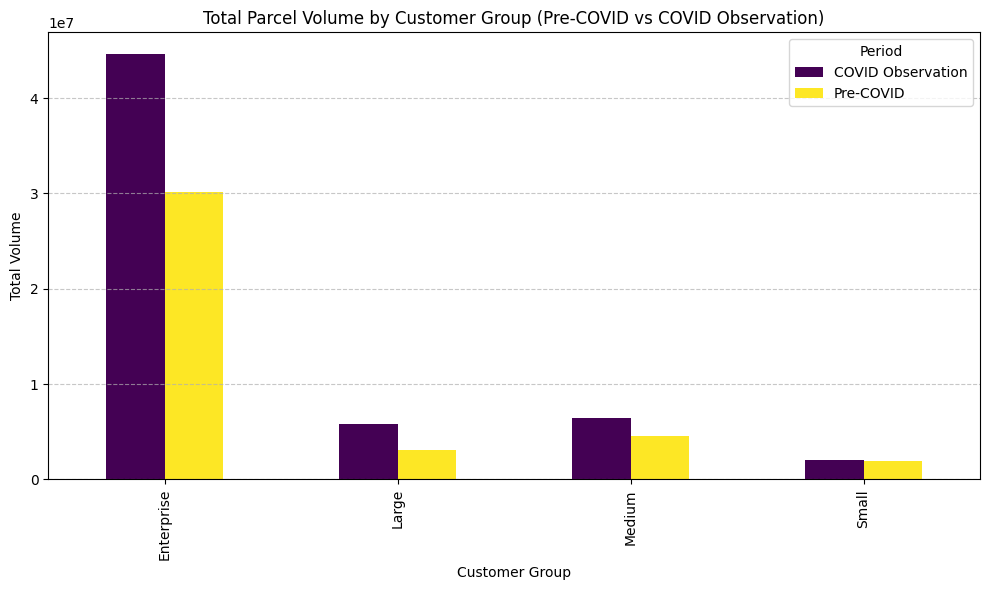

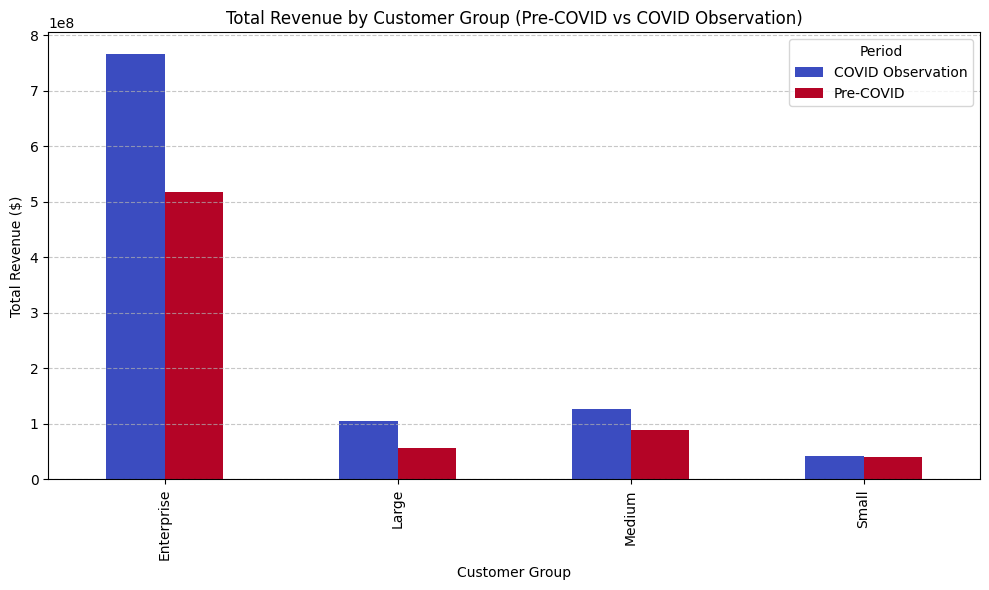

In [173]:
# Step 1: Define periods
pre_covid_df = get_parcel_by_period(2019, 16, 2019, 53).copy()
pre_covid_df['Period'] = 'Pre-COVID'

covid_df = get_parcel_by_period(2020, 16, 2020, 53).copy()
covid_df['Period'] = 'COVID Observation'

# Step 2: Combine both periods into a single DataFrame
combined_df = pd.concat([pre_covid_df, covid_df])

# Step 3: Assign customer size for 2020 and calculate revenue
combined_df['Customer Size'] = combined_df[f'Customer Size {2020}']

combined_df['Revenue'] = combined_df['Volume'] * 22 * (1 - combined_df[f'Discount % {2020}'] / 100)
combined_df = combined_df[combined_df['Customer Size'] != 'Miscellaneous']

# Step 4: Group by Customer Size and Period, and calculate total volume and revenue
impact_summary = combined_df.groupby(['Customer Size', 'Period']).agg({
    'Volume': 'sum',
    'Revenue': 'sum'
}).reset_index()

# Step 5: Pivot data for comparison
impact_pivot = impact_summary.pivot(index='Customer Size', columns='Period', values=['Volume', 'Revenue'])
impact_pivot['Volume', 'Percentage Change'] = ((impact_pivot['Volume', 'COVID Observation'] - impact_pivot['Volume', 'Pre-COVID']) / impact_pivot['Volume', 'Pre-COVID']) * 100
impact_pivot['Revenue', 'Percentage Change'] = ((impact_pivot['Revenue', 'COVID Observation'] - impact_pivot['Revenue', 'Pre-COVID']) / impact_pivot['Revenue', 'Pre-COVID']) * 100

# Volume comparison
impact_summary_volume = impact_summary.pivot(index='Customer Size', columns='Period', values='Volume')
impact_summary_volume.plot(kind='bar', figsize=(10, 6), colormap='viridis', ylabel='Total Volume')
plt.title('Total Parcel Volume by Customer Group (Pre-COVID vs COVID Observation)')
plt.xlabel('Customer Group')
plt.ylabel('Total Volume')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Revenue comparison
impact_summary_revenue = impact_summary.pivot(index='Customer Size', columns='Period', values='Revenue')
impact_summary_revenue.plot(kind='bar', figsize=(10, 6), colormap='coolwarm', ylabel='Total Revenue ($)')
plt.title('Total Revenue by Customer Group (Pre-COVID vs COVID Observation)')
plt.xlabel('Customer Group')
plt.ylabel('Total Revenue ($)')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
